In [5]:
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append('../zdrojaky')
from tsplot import tsplot
from statsmodels import tsa
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings; warnings.simplefilter('ignore')
from statsmodels.api import qqplot
plt.rcParams['figure.figsize'] = [10, 5]

# Modelování nestacionární časové řady se sezónními vlivy

Nyní se podíváme na nestacionární časovou řadu se sezónností, konkrétně na již oblíbené letecké cestovatele (viz přednáška). Data jsou uložena v `international-airline-passengers.csv`.

**Úkol: natáhněte data (pozor na hlavičky) a analyzujte je pomocí funkce `tsplot()`. Jaké vlastnosti má časová řada?**

In [2]:
fn = '../zdrojaky/international-airline-passengers.csv'
data = np.genfromtxt(fn, delimiter=',', usecols=1, skip_header=1)

<Figure size 1080x216 with 0 Axes>

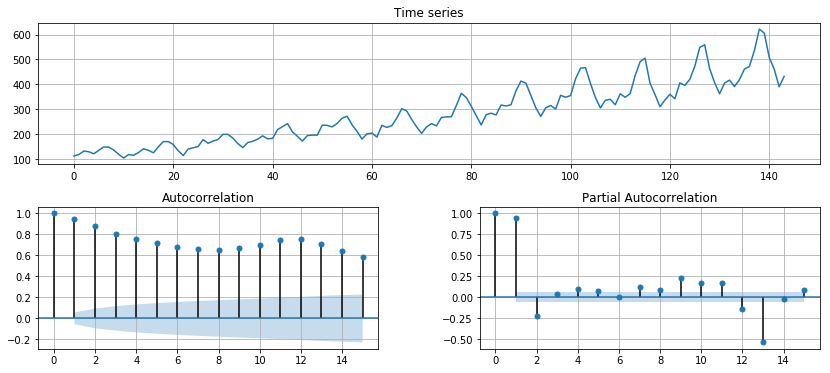

In [3]:
plt.figure(figsize=(15, 3))
tsplot(data)
plt.show()

**Úkol: diferencujte časovou řadu sezónně i nesezónně a analyzujte výsledky.**

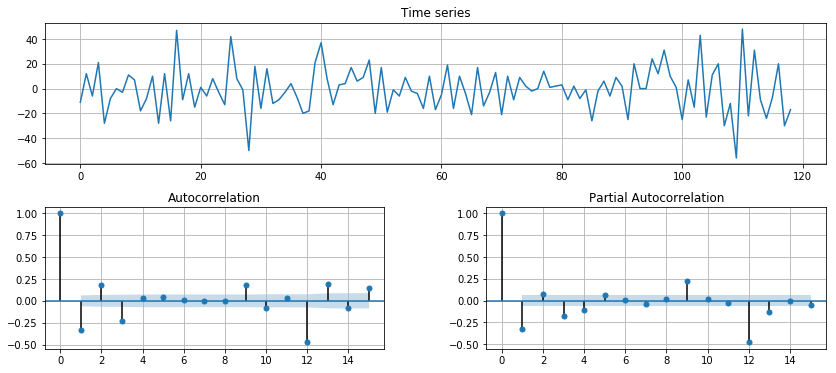

In [4]:
dt = data[12:]-data[:-12]
dt = dt[12:]-dt[:-12]
#dt = dt[12:]-dt[:-12]
dt2 = dt[1:]-dt[:-1]
tsplot(dt2)

**Úkol: Budeme fitovat pomocí třídy `SARIMAX` z `statsmodels.tsa.statespace.sarimax`. Ozkoušejte několik možných konfigurací parametrů - držte se pravidel z přednášky.**

In [7]:
model = SARIMAX(data, order=(0,1,2), seasonal_order=(0,1,2,12), enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -505.727
Date:                            Thu, 31 Jan 2019   AIC                           1021.453
Time:                                    08:49:17   BIC                           1036.303
Sample:                                         0   HQIC                          1027.487
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3578      0.086     -4.168      0.000      -0.526      -0.190
ma.L2          0.0192      0.112   

- [Ljung-Boxův test testuje H0: no autocorrelation of residues](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html)
- [Heteroskedasticity test - H0: no heteroskedasticity](https://www.statsmodels.org/dev/generated/statsmodels.regression.recursive_ls.RecursiveLSResults.test_heteroskedasticity.html)
- [Jarque-Bera - H0: normální distribuce](https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.jarque_bera.html)

**Úkol: podívejme se nyní na ACF, PACF a řadu reziduí pomocí `tsplot()` a interpretujme výsledky.**

<Figure size 1080x216 with 0 Axes>

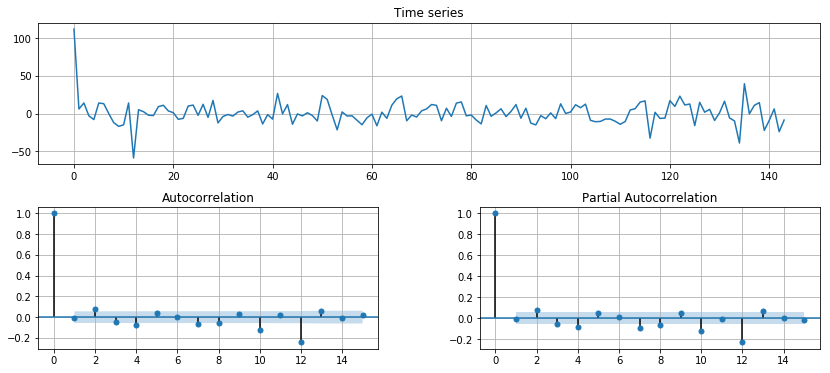

In [24]:
plt.figure(figsize=(15,3))
tsplot(result.resid)
plt.show()

**Úkol: vykreslíme histogram reziduí a qq-plot a interpretujeme výsledky.**

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


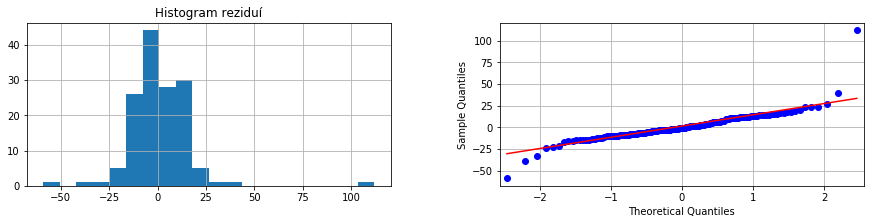

In [25]:
plt.figure(figsize=(15,3))
ax = plt.subplot(1,2,1)
plt.hist(result.resid, bins=20)
plt.title('Histogram reziduí')
ax = plt.subplot(1,2,2)
qqplot(result.resid, line='q', ax=ax)
plt.show()

**Úkol: zkusme nyní predikce na `nsteps` dopředu. K tomu slouží `metoda result.get_forecast()`, která vrátí instanci obsahující mj. atribut `predicted_mean` (predikovaná hodnota) a `summary_frame()`, v němž najdeme kromě predikovaných hodnot i intervaly spolehlivosti. Vykresleme tedy predikce vč. intervalů.**

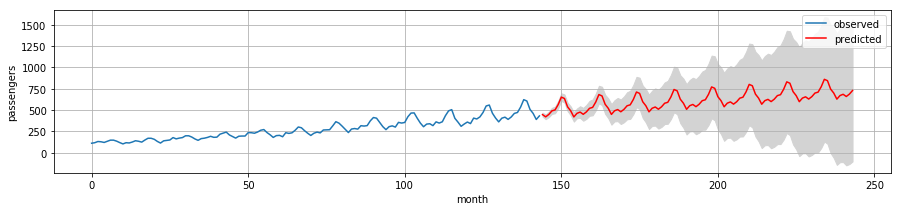

In [26]:
nsteps = 100
forecast = result.get_forecast(steps=nsteps)
plt.figure(figsize=(15,3))
plt.plot(np.arange(data.size), data, label='observed')
plt.plot(np.arange(data.size, data.size+forecast.predicted_mean.size), 
         forecast.predicted_mean, 'r', label='predicted')
plt.fill_between(np.arange(data.size, data.size+forecast.predicted_mean.size), 
                 forecast.summary_frame()['mean_ci_lower'],
                 forecast.summary_frame()['mean_ci_upper'],
                 color='lightgray')
plt.legend()
plt.xlabel('month')
plt.ylabel('passengers')
plt.show()